   There are approximately 6.5 million animals that enter US animal shelters nationwide every year. Of these animals, only roughly half of them are adopted (~3.2 million) while approximately 1.5 million are euthanized every year$^{[1]}$.  Therfore, in order to give as many animals homes, and to avoid as much undue pain and suffering as possible, it is nessecary to learn which traits make these animals most likely to be not only adopted, but adopted quickly in order to optimize shelter space for these animals.

   In order to see trends in the types of dogs adopted I found data from the nations largest no-kill shelter in Austin, Texas to determine which traits make dogs most likely to be adopted. I hypothesize that the most influential traits will be the age of the dog, the breed, and the gender in terms of the probability of that dog being adopted.  Using the code below, I attempt to evaluate the following questions using this data.

     1- How does age influence the chances of a dog being adopted and its length of stay in the shelter?
     2- Are there differences between breeds in terms of adoption rates and length of stay in shelter?
     3- Are the adoption rates and length of stay in shelter influenced by the gender of the dogs?
     
data used:
https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in shelter data 
data = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\dog_data\dog_data.csv')

In [3]:
# Subset data into only dogs 
dogs = data[data['animal_type']=='Dog']

# Subset data into only adopted dogs
adopted = dogs[dogs['outcome_type']=='Adoption']

#  1- How does age influence the chances of a dog being adopted and its length of stay in the shelter?

(0, 1)

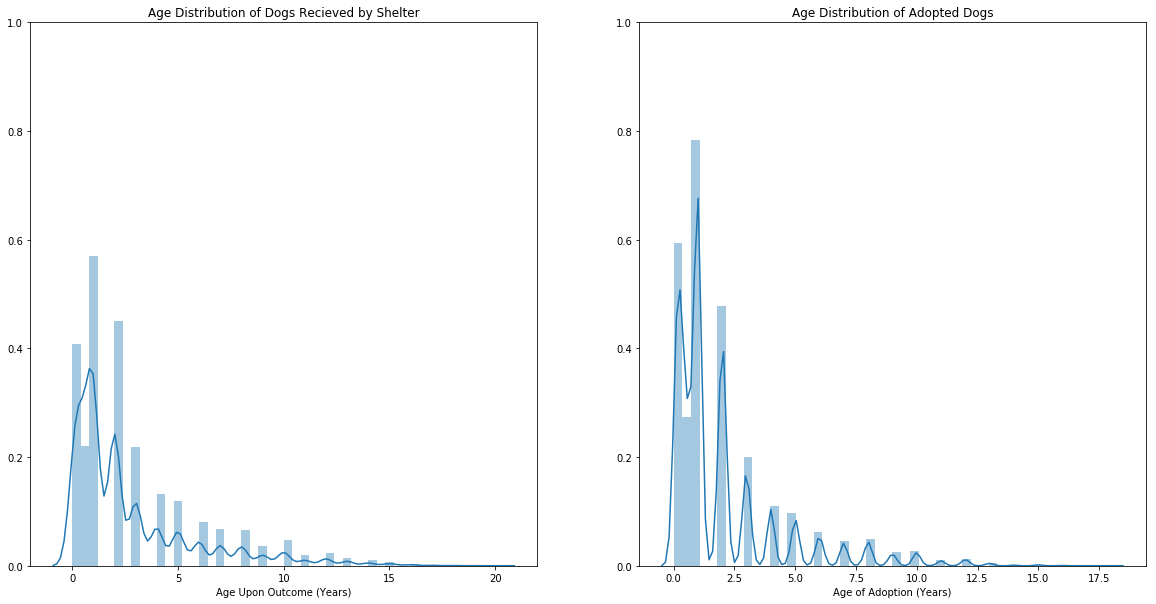

In [4]:
# Plot age distribution of all dogs recieved by shelter and dogs adopted by shelter
figure = plt.figure(figsize=(20,10))

# Plot for dogs Recieved
plt.subplot(121)
sns.distplot(dogs['age_upon_outcome_(years)'],hist=True)
plt.title("Age Distribution of Dogs Recieved by Shelter")
plt.xlabel("Age Upon Outcome (Years)")
plt.ylim(0,1)

# Plot for adopted dogs
plt.subplot(122)
sns.distplot(adopted['age_upon_outcome_(years)'],hist=True)
plt.title("Age Distribution of Adopted Dogs")
plt.xlabel("Age of Adoption (Years)")
plt.ylim(0,1)

An initial look at the two plots above shows that there are a disporportionate number of younger dogs adopted from the incoming population.  In order to investigate this further I grouped the dogs into various age groups based on the distribution of the ages of the incoming dogs, which can be seen in the boxplot below along with a line divinding each of the age classes.

               AGE CLASSES
           Puppy = <1 Year Old
      Adolescent = 1-2 Years Old
           Adult = >2-8 Years Old
          Senior = >8 Years Old
          

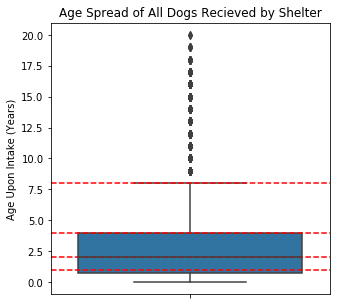

In [5]:
# Show age distribution of incoming dogs with boxplot and mark age classes
figure = plt.figure(figsize=(5,5))
ages_plot = sns.boxplot(y=dogs['age_upon_intake_(years)'])
plt.title("Age Spread of All Dogs Recieved by Shelter")
plt.ylabel("Age Upon Intake (Years)")
ages_plot.axhline(1,color='red',linestyle='--')
ages_plot.axhline(2,color='red',linestyle='--')
ages_plot.axhline(4,color='red',linestyle='--')
ages_plot.axhline(8,color='red',linestyle='--')
plt.show()

In [6]:
# Define function to assign age classes 
def age_classifier(x):
    if x < 1:
        return "PUPPY"
    elif 1 <= x < 2:
        return "ADOLESCENT"
    elif 2 <= x < 8:
        return "ADULT"
    elif x >= 8:
        return "SENIOR"

#dogs['AGE CLASS'] = dogs['age_upon_intake_(years)'].apply(age_classifier)
df = pd.DataFrame(dogs['age_upon_intake_(years)'].apply(age_classifier))
dogs['AGE CLASS']= df['age_upon_intake_(years)']

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# Subset data into only adopted dogs 
adopted_dogs = dogs[dogs['outcome_type']=='Adoption']

# Determine counts for each class
all_count = dogs.groupby('AGE CLASS').count()
all_count = all_count.sort_values('count',ascending=False)
adopted_count = adopted_dogs.groupby('AGE CLASS').count()
adopted_count = adopted_count.sort_values('count',ascending=False)

(0, 150)

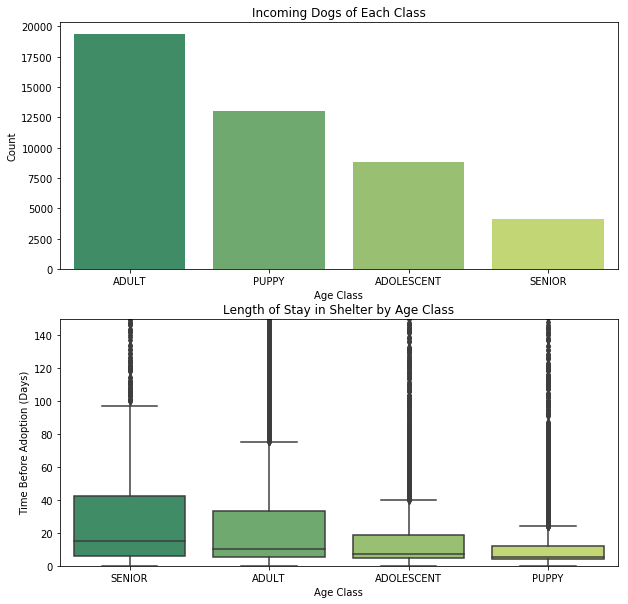

In [8]:
figure = plt.figure(figsize=(10,10))

# Plot count of each age class
plt.subplot(211)
sns.barplot(y=all_count['count'],x=all_count.index,palette='summer')
plt.title("Incoming Dogs of Each Class")
plt.ylabel("Count")
plt.xlabel("Age Class")

# Plot length of stay within each age class
plt.subplot(212)
sns.boxplot(x='AGE CLASS',y='time_in_shelter_days',data=adopted_dogs,palette='summer')
plt.title("Length of Stay in Shelter by Age Class")
plt.ylabel("Time Before Adoption (Days)")
plt.xlabel("Age Class")
plt.ylim(0,150)

In [9]:
# Determine percentage of each age class adopted and print
adoption_ratio = adopted_count['count'] / all_count['count']
adoption_ratio = round(adoption_ratio,2)
print('''
      The Probability of Being Adopted Within Each Age Class Is.....
      ''')
print(adoption_ratio.sort_values(ascending=False))


      The Probability of Being Adopted Within Each Age Class Is.....
      
AGE CLASS
PUPPY         0.58
ADOLESCENT    0.53
ADULT         0.38
SENIOR        0.23
Name: count, dtype: float64


In [10]:
# How do these values compare to the average?

# Determine percent of total incoming dogs that are adopted at this shelter
total_dogs = len(dogs)
total_dogs_adopted = len(adopted_dogs)
percent_dogs_adopted = round((total_dogs_adopted / total_dogs)*100,2)

# Define function to print average for comparisons below
def print_average():
    print('''
The Percentage of Total Incoming Dogs Adopted From this Shelter is 45.37%
''')
    
print_average()



The Percentage of Total Incoming Dogs Adopted From this Shelter is 45.37%



The data above shows that as most people would expect, younger dogs are much more likely to be adopted than older dogs.  Furthermore, based on the plots seen above, despite the fact that a very small fraction of the dogs recieved by the pound fit into the senior category, this category typically tends to spend the longest amount of time in the shelter when compared to the younger age groups. Conversely, puppies are one of the more common classes recieved by this shelter and they usually tend to be adopted the fastest (usually somewhere within a month).  Overall, this data shows that as the age of the dogs recieved increases, the lower the chances of them being adopted are, and the more time they end up staying in the shelter occupying space and using shelter resources. 

# 2- Are there differences between breeds in terms of adoption rates and length of stay in shelter?

In [11]:
# Determine most and least common dog breeds recieved by shelter

all_breeds = dogs.groupby('breed').count().sort_values('count',ascending=False)
print('''
The Top Ten Breeds Recieved by This Shelter Are.....
''')
print(all_breeds['count'][:10])
print('''
The bottom Ten Breeds Recieved by This Shelter Are.....
''')
print(all_breeds['count'][-10:])


The Top Ten Breeds Recieved by This Shelter Are.....

breed
Pit Bull Mix                 6256
Chihuahua Shorthair Mix      4831
Labrador Retriever Mix       4789
German Shepherd Mix          1950
Australian Cattle Dog Mix    1099
Dachshund Mix                 811
Boxer Mix                     683
Border Collie Mix             662
Miniature Poodle Mix          662
Catahoula Mix                 480
Name: count, dtype: int64

The bottom Ten Breeds Recieved by This Shelter Are.....

breed
Jack Russell Terrier/American Staffordshire Terrier    1
Jack Russell Terrier/Australian Shepherd               1
Jack Russell Terrier/Basset Hound                      1
Jack Russell Terrier/Boston Terrier                    1
Jack Russell Terrier/Brittany                          1
Jack Russell Terrier/Cardigan Welsh Corgi              1
Jack Russell Terrier/Cavalier Span                     1
Jack Russell Terrier/Chihuahua Longhair                1
Jack Russell Terrier/Manchester Terrier              

In [12]:
# Many of least common breeds have only one entry 

# Drop breeds with <100 dogs to make data more representative
common_breeds = all_breeds[all_breeds['count']>100].index
common_dogs = dogs[dogs['breed'].isin(common_breeds)]

# See how many unique breeds remain
final = len(common_dogs['breed'].unique())
initial = len(dogs['breed'].unique())
diff = initial - final
statement="There have been {} breeds removed from an initial {} leaving {} unique breeds remaining"
print(statement.format(diff,initial,final))


There have been 1857 breeds removed from an initial 1919 leaving 62 unique breeds remaining


In [13]:
# Determine counts by breed type
breed_count = common_dogs.groupby('breed').count()

# Determine counts by breed type for adopted dogs 
adopted_common_breeds = common_dogs[common_dogs['outcome_type']=='Adoption']
adopted_count = adopted_common_breeds.groupby('breed').count()
breed_count['ADOPTED COUNT'] = adopted_count['count']

# Create new column containing adoption rate within each breed
breed_count['ADOPTION RATE'] = breed_count['ADOPTED COUNT'] / breed_count['count']
breed_count = breed_count.sort_values('ADOPTION RATE',ascending=False)
breed_count['ADOPTION RATE']=round(breed_count['ADOPTION RATE'],2)

breed_count['TOTAL RECEIVED']=breed_count['count']

print('''
The Probabilities of Being Adopted for the Top Ten Breeds Are.....
      ''')
print(breed_count[['ADOPTION RATE','ADOPTED COUNT','TOTAL RECEIVED']].head(n=10))
print('''
The Probabilities of Being Adopted for the Bottom Ten Breeds Are.....
      ''')
print(breed_count[['ADOPTION RATE','ADOPTED COUNT','TOTAL RECEIVED']].tail(n=10))

# Compare to average 
print_average()




The Probabilities of Being Adopted for the Top Ten Breeds Are.....
      
                               ADOPTION RATE  ADOPTED COUNT  TOTAL RECEIVED
breed                                                                      
Blue Lacy Mix                           0.67             76             114
Black Mouth Cur Mix                     0.63            154             246
Manchester Terrier Mix                  0.60             61             101
Cairn Terrier Mix                       0.60            209             348
Dachshund/Chihuahua Shorthair           0.59            106             179
Australian Kelpie Mix                   0.59            141             240
Pointer Mix                             0.59            197             336
Queensland Heeler Mix                   0.58             87             150
Anatol Shepherd Mix                     0.58            146             253
Miniature Pinscher Mix                  0.57             89             156

The Probabil

In [14]:
# Way to use without index function

# Subset data into top ten dog breeds adopted
top_ten = breed_count.iloc[:10]
top_10_breeds =top_ten.index
top_dogs = adopted_dogs[adopted_dogs['breed'].isin(top_10_breeds)]

# Subset data into bottom ten dog breeds adopted
bott_ten = breed_count.iloc[-10:]
bott_10_breeds = bott_ten.index
bott_dogs = adopted_dogs[adopted_dogs['breed'].isin(bott_10_breeds)]

# Determine averages across top ten and bottom ten breeds adopted
top_dog_avg = top_dogs.groupby('breed').mean()
bott_dog_avg = bott_dogs.groupby('breed').mean()

(0, 20)

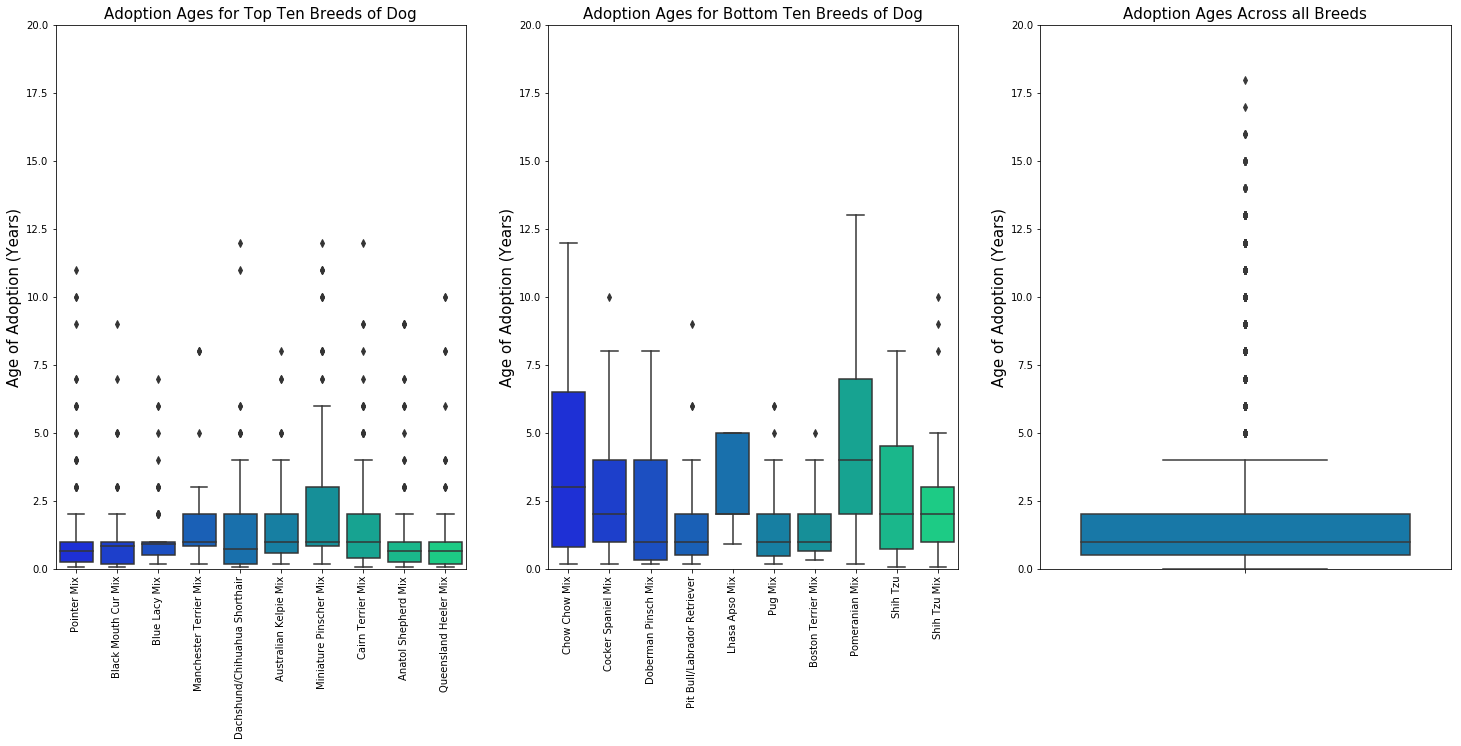

In [15]:
# Create plots to show differences in adoption ages between top and bottom ten breeds

plt.figure(figsize=(25,10))

plt.subplot(131)
sns.boxplot(y='age_upon_outcome_(years)',x='breed',data=top_dogs,palette='winter')
plt.title("Adoption Ages for Top Ten Breeds of Dog",size=15)
plt.ylabel("Age of Adoption (Years)",size=15)
plt.xlabel("")
plt.xticks(rotation='vertical')
plt.axhline(30,color='red',linestyle='--')
plt.ylim(0,20)

plt.subplot(132)
sns.boxplot(y='age_upon_outcome_(years)',x='breed',data=bott_dogs,palette='winter')
plt.title("Adoption Ages for Bottom Ten Breeds of Dog",size=15)
plt.ylabel("Age of Adoption (Years)",size=15)
plt.xlabel("")
plt.xticks(rotation='vertical')
plt.ylim(0,20)

plt.subplot(133)
sns.boxplot(y='age_upon_outcome_(years)',data=adopted_dogs,palette='winter')
plt.title("Adoption Ages Across all Breeds",size=15)
plt.ylabel("Age of Adoption (Years)",size=15)
plt.xlabel(" ")
plt.xticks(rotation='vertical')
plt.ylim(0,20)

(0, 150)

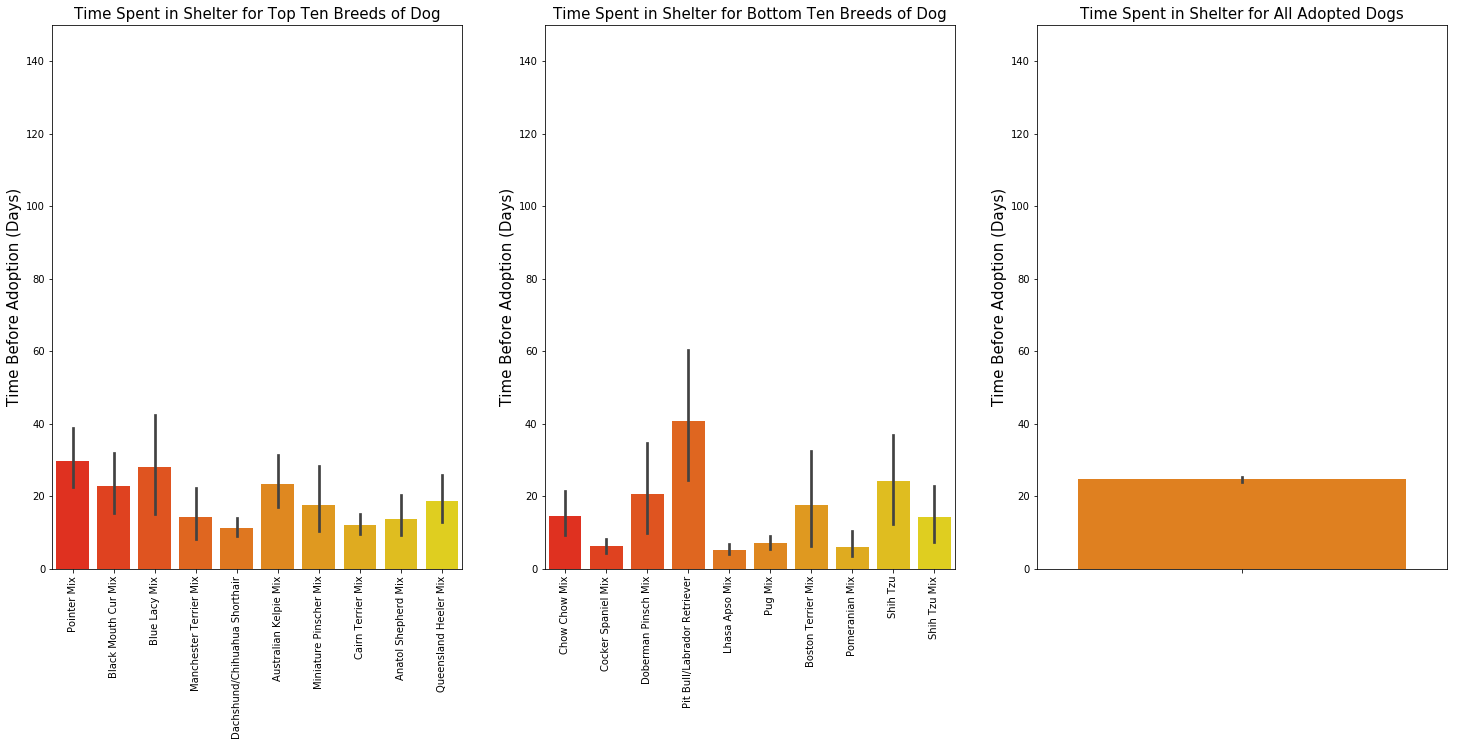

In [16]:
# Create plots showing differences in length of stay for top and bottom ten breeds

plt.figure(figsize=(25,10))

plt.subplot(131)
sns.barplot(y='time_in_shelter_days',x='breed',data=top_dogs,palette='autumn')
plt.title("Time Spent in Shelter for Top Ten Breeds of Dog",size=15)
plt.ylabel("Time Before Adoption (Days)",size=15)
plt.xlabel("")
plt.xticks(rotation='vertical')
plt.ylim(0,150)

plt.subplot(132)
sns.barplot(y='time_in_shelter_days',x='breed',data=bott_dogs,palette='autumn')
plt.title("Time Spent in Shelter for Bottom Ten Breeds of Dog",size=15)
plt.xlabel("")
plt.ylabel("Time Before Adoption (Days)",size=15)
plt.xticks(rotation='vertical')
plt.ylim(0,150)

plt.subplot(133)
sns.barplot(y='time_in_shelter_days',data=adopted_dogs,palette='autumn')
plt.title("Time Spent in Shelter for All Adopted Dogs",size=15)
plt.ylabel("Time Before Adoption (Days)",size=15)
plt.xlabel(" ")
plt.xticks(rotation='vertical')
plt.ylim(0,150)

The data above shows that breed plays a very significant role in the chances of a dog being adopted.  However, based on the plots it seems that the ages of the dogs within each breed also plays a role in the chances of the dog being adopted, which is illustrated by the plots on the top which show that the top ten breeds seem to be adopted at much younger ages.  This could potentially indicate that the top and bottom breeds determined could have been affected by the ages of the dogs within each breed recieved by the shelter.  Furthermore, In the plots on the bottom it can be seen, that for the most part, the length of stay for the top ten breeds seems to be shorter than the average stay for the bottom ten breeds.

#  3- Are the adoption rates and length of stay in shelter influenced by the gender of the dogs?

In [17]:
# Create identifiers for males and females
male_ids = ['Intact Male','Neutered Male']
female_ids = ['Intact Female','Spayed Female']

# Subset into male and female dogs
males = adopted_dogs[adopted_dogs['sex_upon_outcome'].isin(male_ids)]
females = adopted_dogs[adopted_dogs['sex_upon_outcome'].isin(female_ids)]
all_males = dogs[dogs['sex_upon_outcome'].isin(male_ids)]
all_females = dogs[dogs['sex_upon_outcome'].isin(female_ids)]

# Calculate percentage of each gender adopted and print
percent_males_adopted = len(males) / len(all_males)
percent_females_adopted = len(females) / len(all_females)
percent_males= round(percent_males_adopted*100,2)
percent_females = round(percent_females_adopted*100,2)

statement = "{}% of incoming female dogs were adopted while only {}% of incoming male dogs were adopted"
print(statement.format(percent_females,percent_males))
print_average()


48.13% of incoming female dogs were adopted while only 43.45% of incoming male dogs were adopted

The Percentage of Total Incoming Dogs Adopted From this Shelter is 45.37%



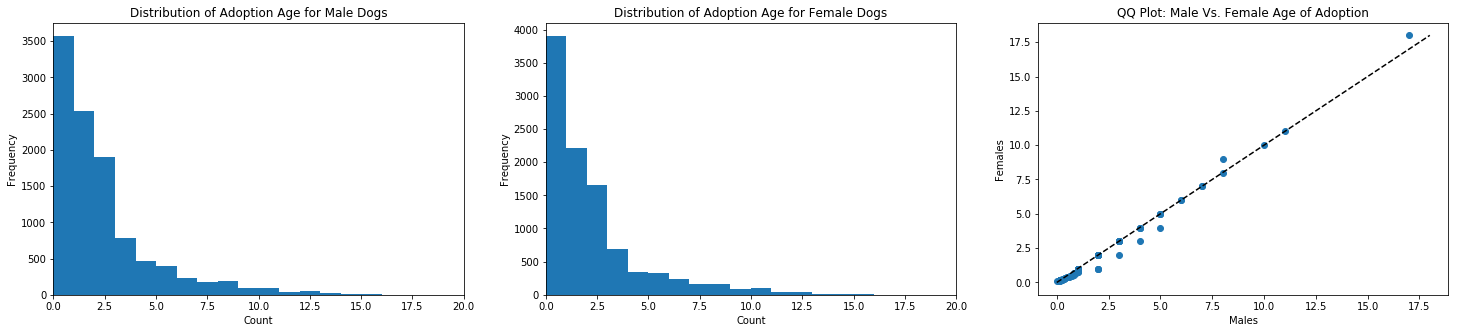

In [18]:
figure = plt.figure(figsize=(25,5))

# Plot distributions of the adoption age for each population using histograms 

plt.subplot(131)
plt.hist(males['age_upon_outcome_(years)'],bins=np.arange(0,100))
plt.title("Distribution of Adoption Age for Male Dogs")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.xlim(0,20)

plt.subplot(132)
plt.hist(females['age_upon_outcome_(years)'],np.arange(0,100))
plt.title("Distribution of Adoption Age for Female Dogs")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.xlim(0,20)

plt.subplot(133)

# Create QQ Plot comparing distributions

percs = np.linspace(0,100,100)
q_males = np.percentile(males['age_upon_outcome_(years)'],percs)
q_fem = np.percentile(females['age_upon_outcome_(years)'],percs)
line = np.linspace(np.min((q_males.min(),q_fem.min())), np.max((q_males.max(),q_fem.max())))

plt.plot(q_males,q_fem,ls="",marker="o")
plt.plot(line,line, color="black", ls="--")
plt.title("QQ Plot: Male Vs. Female Age of Adoption")
plt.xlabel("Males")
plt.ylabel("Females")

plt.show()

In [19]:
# Create function to get stats from each population
def get_stats(x):
    mean = x.mean()
    median = x.median()
    stdev = x.std()
    var = x.var()
    print("              Mean={}".format(round(mean,2)))
    print("            Median={}".format(round(median,2)))
    print("Standard Deviation={}".format(round(stdev,2)))
    print("          Variance={}".format(round(var,2)))
      
print('''
Adoption Ages For All Dogs
''')
get_stats(adopted_dogs['age_upon_outcome_(years)'])
        
print('''
Adoption Ages for Male Dogs
''')
get_stats(males['age_upon_outcome_(years)'])

print('''
Adoption Ages for Female Dogs
''')
get_stats(females['age_upon_outcome_(years)'])


Adoption Ages For All Dogs

              Mean=1.97
            Median=1.0
Standard Deviation=2.35
          Variance=5.5

Adoption Ages for Male Dogs

              Mean=2.02
            Median=1.0
Standard Deviation=2.34
          Variance=5.47

Adoption Ages for Female Dogs

              Mean=1.92
            Median=1.0
Standard Deviation=2.35
          Variance=5.53


In [20]:
# Run t-test comparing popluations
from scipy.stats import ttest_ind
print(ttest_ind(males['age_upon_outcome_(years)'],females['age_upon_outcome_(years)'], equal_var=False))
# P value >0.05 indicates that two populations are significantly different and the age that female dogs get adopted at is significantly lower

Ttest_indResult(statistic=3.020703986320599, pvalue=0.002524982831381407)


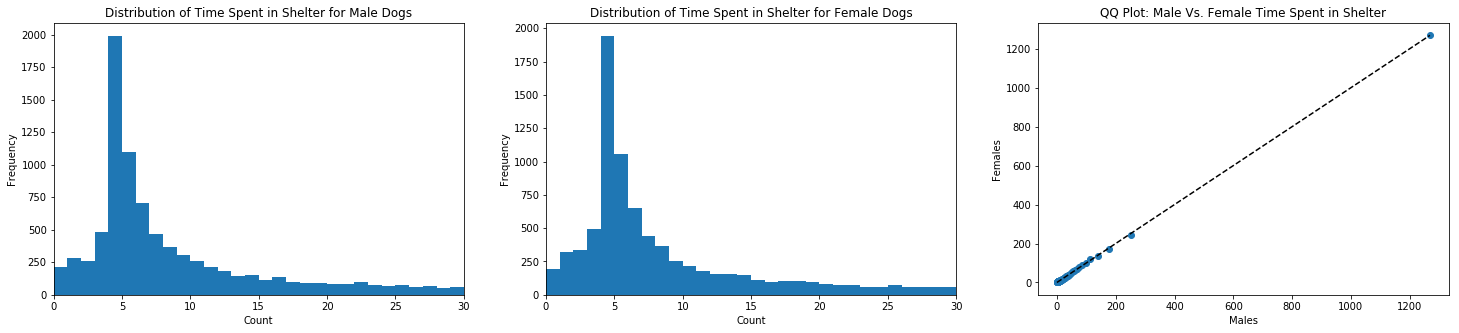

In [21]:
figure = plt.figure(figsize=(25,5))

# Show distributions of populations with histograms

plt.subplot(131)
plt.hist(males['time_in_shelter_days'],bins=np.arange(0,100))
plt.title("Distribution of Time Spent in Shelter for Male Dogs")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.xlim(0,30)

plt.subplot(132)
plt.hist(females['time_in_shelter_days'],np.arange(0,100))
plt.title("Distribution of Time Spent in Shelter for Female Dogs")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.xlim(0,30)

plt.subplot(133)

# Create QQ Plot comparing distributions of time in shelter

percs = np.linspace(0,100,100)
q_males = np.percentile(males['time_in_shelter_days'],percs)
q_fem = np.percentile(females['time_in_shelter_days'],percs)
line = np.linspace(np.min((q_males.min(),q_fem.min())), np.max((q_males.max(),q_fem.max())))

plt.plot(q_males,q_fem,ls="",marker="o")
plt.plot(line,line, color="black", ls="--")
plt.title("QQ Plot: Male Vs. Female Time Spent in Shelter")
plt.xlabel("Males")
plt.ylabel("Females")

plt.show()

In [22]:
print('''
Days Spent in Shelter for All Adopted Dogs
''')
get_stats(adopted_dogs['time_in_shelter_days'])
        
print('''
Days Spent in Shelter for Male Dogs
''')
get_stats(males['time_in_shelter_days'])

print('''
Days Spent in Shelter for Female Dogs
''')
get_stats(females['time_in_shelter_days'])


Days Spent in Shelter for All Adopted Dogs

              Mean=24.68
            Median=7.12
Standard Deviation=53.69
          Variance=2883.11

Days Spent in Shelter for Male Dogs

              Mean=24.78
            Median=7.21
Standard Deviation=52.8
          Variance=2788.08

Days Spent in Shelter for Female Dogs

              Mean=24.59
            Median=7.02
Standard Deviation=54.62
          Variance=2983.35


In [23]:
# Run t-test comparing popluations
from scipy.stats import ttest_ind
print(ttest_ind(males['time_in_shelter_days'],females['time_in_shelter_days'], equal_var=False))
# p value >0.05 means populations are not significantly different

Ttest_indResult(statistic=0.2548917772117368, pvalue=0.7988092526082976)


This data shows that gender did play a role in the chances of a dog being adopted, and that the female dogs are ~5% more likely to be adopted than the male dogs.  Furthermore the the average length of stay and age of adoption betweeen the two populations were nearly identical based on the qq plots comparing these traits for each population.  Also, the t-test results showed that while female and male dogs spend roughly the same amount of time in the shelter, the female dogs are generally adopted at a slightly younger age.  This could potentially be due to differences in the ages recieved within each group, although additional work is needed to test this assertion.

# CONCLUSIONS AND FUTURE RESEARCH

Overall this data showed that as hypothesized, the breed, gender, and age all play some role in the chances of a dog being adopted.  Based on the data obtained, as the age of a dog increases, its chances of being adopted go down substiantially, from roughly a 58% chance of being adopted as a puppy (defined as a dog <1 year old) versus only a 23% chance of being adopted as a senior (defined as a dog >8 years old), meaning that a puppy is over twice as likely to be adopted as an elderly dog.  Furthermore, elderly dogs were shown to have generally stayed in the shelter longer than the puppies meaning that elderly dogs are not only less likely to be adopted, but are more likely to stay in the shelter much longer, consuming shelter resources and space.

The breed of the dogs also played a substantial difference in the dogs being adopted with the top ten most popular breeds being over twice as likely to be adopted as the bottom ten breeds of dog. However, the differences between breeds might be skewed by differences in the age classes recieved within these breeds.  For example, for most breeds the time spent in the shelter was roughly the same (usually somewhere within a month) regardless of the popularity of that breed.  However, there were two of the bottom breeds that showed a disproportionately larger length of stay in the shelter when compared to other breeds, the Pit Bull/Labrador Retriever and Shih Tzus.   The data showed that many of these two breeds often stayed much longer at the shelter than not only the top or bottom breeds, but the whole population of dogs adopted from the shelter.

The gender of dogs also was shown to play a role in the chances of a dog being adopted with female dogs being nearly 5% more likely to be adopted than male dogs. This difference can be assumed to be significant due to the fact that the distribtuion within each gender seems to be the same for both the age at adoption and time spent in shelter based on the qq plots generated from both populations.  However, based on the t-test for the age of adoption, there is a significant difference between the mean ages of the dogs adopted within each group although this could potentially be due in part to the ages of the dogs recieved.

Overall, I believe that the chances of a dog being adopted are most likely affected by some mix of all three of these categories, since there may be some breeds of dog that some people like more at older ages and some breeds that people like more as puppies.  Future reserach is still needed to test this assertion, and would most likely involve some type of multivariate regression between all three factors in order to properly weight each.  It is also possible that the data obtained from this shelter is not representative of all shelters nationwide, possibly due to differences in personal preferences in pets by state, differences in the types of dog breeds present in each state, and potentially even the status of this shelter as no kill, since people may be more likely to adopt a dog when they believe that the dog might be euthanized if they do not.  This could be tested by applying a similar analysis to other animal shelters nationwide.  However, that being said, I believe that this data should representative of peoples preferences for at least Texas due to the fact that this is the largest no-kill shelter nationwide meaning that there is a great deal of data obtained from this shelter.

# Citations

[1] - https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics